# Sentimental Analysis on Large Data

## Downloading the data

In [18]:
import pandas as pd
from io import BytesIO, TextIOWrapper
from zipfile import ZipFile
import urllib.request
import numpy as np

url =  "https://archive.ics.uci.edu/static/public/331/sentiment+labelled+sentences.zip"

resp = urllib.request.urlopen(url)
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(
    zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),
    encoding='utf-8'
)

df = pd.read_csv(data, sep='\t', header=None)
df.columns = ['review', 'sentiment']

## Exploring the data

In [19]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [21]:
df.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [22]:
df.shape

(1000, 2)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.loc[:, "review"]
y = df.loc[:, "sentiment"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Preprocessing

In [26]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer()

In [31]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(penalty='l2', loss='hinge')

## Partialfit iterations

In [32]:
X_train_part1_hashed = vectorizer.fit_transform(X_train[0:400])
y_train_part1 = y_train[0:400]

In [33]:
all_classes = np.unique(df.loc[:, 'sentiment'])

In [34]:
classifier.partial_fit(X_train_part1_hashed, y_train_part1, classes=all_classes)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [35]:
X_test_hashed = vectorizer.transform(X_test)

In [ ]:
# Evaluation on 1st Iterations

test_score = classifier.score(X_test_hashed, y_test)
print("Test score: ", test_score)

Test score:  0.735


In [37]:
X_train_part2_hashed = vectorizer.fit_transform(X_train[400:])
y_train_part2 = y_train[400:]

In [40]:
classifier.partial_fit(X_train_part2_hashed, y_train_part2)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [41]:
test_score = classifier.score(X_test_hashed, y_test)
print("Test score:", test_score)

Test score: 0.82


# K-means on Digit Dataset

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
# Loading the digit dataset
from sklearn.datasets import load_digits
# Selecting k through silhoutte score.
from sklearn.metrics import silhouette_score
# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [44]:
digits = load_digits()

In [45]:
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 50,
    "max_iter" : 500,
    "random_state" : 0
}

In [46]:
pipeline = Pipeline([
    ('Preprocess', MinMaxScaler()),
    ("Clustering", KMeans(n_clusters=10, **kmeans_kwargs))
])

In [48]:
pipeline.fit(digits.data)

,steps,"[('Preprocess', ...), ('Clustering', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_clusters,10
,init,'random'
,n_init,50
,max_iter,500


In [49]:
cluster_centers = pipeline[-1].cluster_centers_

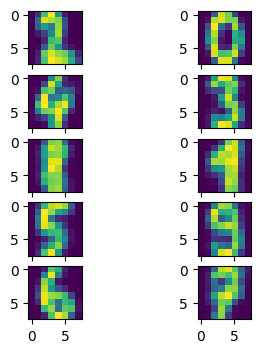

In [50]:
fig, ax = plt. subplots (5, 2, figsize=(4, 4))
for i,j in zip(ax.flat, cluster_centers.reshape (10,8, 8)):
    i.imshow(j)

## Elbow Method

In [53]:
sse_digits = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digits.append(kmeans.inertia_)

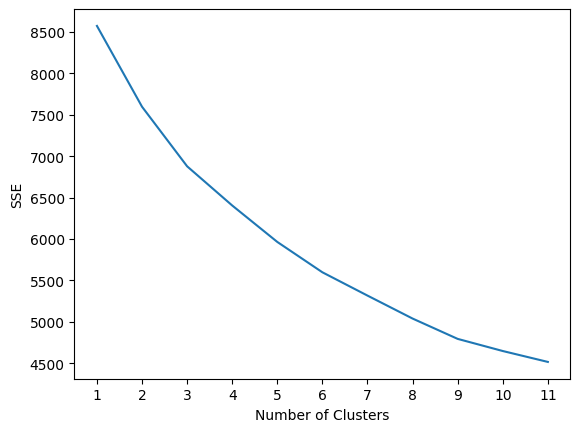

In [54]:
plt.plot(range(1, 12), sse_digits)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters") 
plt.ylabel("SSE")
plt.show()

## Silhoutte

In [55]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append (score)

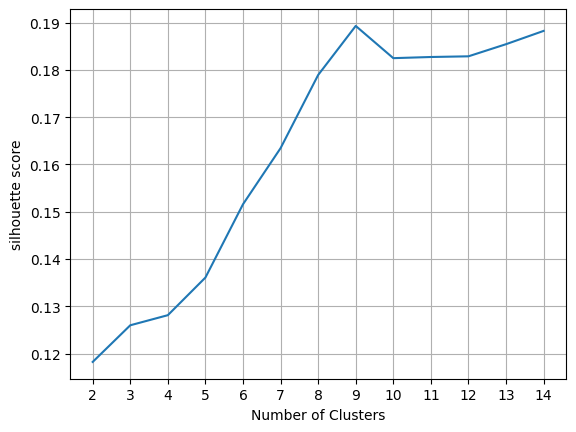

In [59]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters") 
plt.ylabel ("silhouette score")
plt.grid(True)
plt. show()